# Import Lib

In [1]:
%matplotlib inline
!pip install python-louvain
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
from scipy.io import mmread
#import community louvain
from community import community_louvain


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


# Import Graph

In [2]:

read_file = mmread('power-bcspwr10.mtx')
G = nx.Graph(read_file)

Try new visualization

In [3]:
pos = nx.spring_layout(G, iterations=200)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}


In [ ]:

G.remove_edges_from(nx.selfloop_edges(G))




In [ ]:
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

# Basic topological attributes

In [ ]:
def measure(G):
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Density:{nx.density(G)}")
    print(f"Transitivity: {nx.transitivity(G)}")
    print(f"Average Clustering: {nx.average_clustering(G)}")
    print(f"Max Degree: {max(dict(G.degree()).values())}")
    print(f"Min Degree: {min(dict(G.degree()).values())}")
    print(f"Average Degree: {np.mean(list(dict(G.degree()).values()))}")
    print(f"Number of components:{nx.number_connected_components(G)}")
    print(f"Assortativity: {nx.degree_assortativity_coefficient(G)}")

    if(nx.is_connected(G)):
        print("Graph is connected")
        print(f"Diameter:{nx.diameter(G)}")
    else:
        print("Graph is not connected")


In [ ]:
measure(G)

In [ ]:
betwenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
degree_centrality = nx.degree_centrality(G)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title("Betweenness distribution")
plt.hist(betwenness_centrality.values(), bins=100)
plt.subplot(132)
plt.title("Closeness distribution")
plt.hist(closeness_centrality.values(), bins=100)
plt.subplot(133)
plt.title("Degree centrality distribution")
plt.hist(degree_centrality.values(), bins=100)
plt.show()

In [ ]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

# Find the maximum index of all nodes in the graph
max_index = max(G.nodes())

# Create an array to store values from 0 up to (and including) the maximum shortest path length
path_lengths = np.zeros(max_index + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(np.arange(1, max_index + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", loc="center"
)
ax.set_xlabel("Shortest Path Length")
ax.set_ylabel("Frequency (%)")

# Clustering Coeficient Histogram

In [ ]:
plt.figure(figsize=(4, 3))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", loc="center")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Counts")

In [ ]:
#number of unique triangle in the network
triangles_per_node = list(nx.triangles(G).values())
sum(
    triangles_per_node
) / 3  # divide by 3 because each triangle is counted once for each node

In [ ]:
#average number of triangles 
np.mean(triangles_per_node)


# Bridges

In [ ]:
nx.has_bridges(G)


In [ ]:
bridges = list(nx.bridges(G))
len(bridges)

In [ ]:
local_bridges = list(nx.local_bridges(G, with_span=False))
len(local_bridges)

In [ ]:
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15)
nx.draw_networkx_edges(
    G, pos, edgelist=local_bridges, width=0.5, edge_color="lawngreen"
)  # green color for local bridges
nx.draw_networkx_edges(
    G, pos, edgelist=bridges, width=0.5, edge_color="r"
)  # red color for bridges
plt.axis("off")

# Communities

In [ ]:
partition = community_louvain.best_partition(G)
# assign a unique color to each community
colors = [partition[n] for n in G.nodes()]

In [ ]:
pos = nx.spring_layout(G)
plt.figure(figsize=(15, 8))
# draw the graph with nodes colored by community
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.Set1, node_size=10)
nx.draw_networkx_edges(G, pos)


In [ ]:
# print number of comm
print(f"Number of communities: {len(set(partition.values()))}")

In [ ]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
plt.bar(*np.unique(degree_sequence, return_counts=True))
#average degree vicino  alla mediana: 7 -> non è scale free

fig.tight_layout()
plt.show()

## Generating random graph

In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
RG = nx.gnm_random_graph(num_nodes, num_edges)

Number of nodes: 5300
Number of edges: 8271


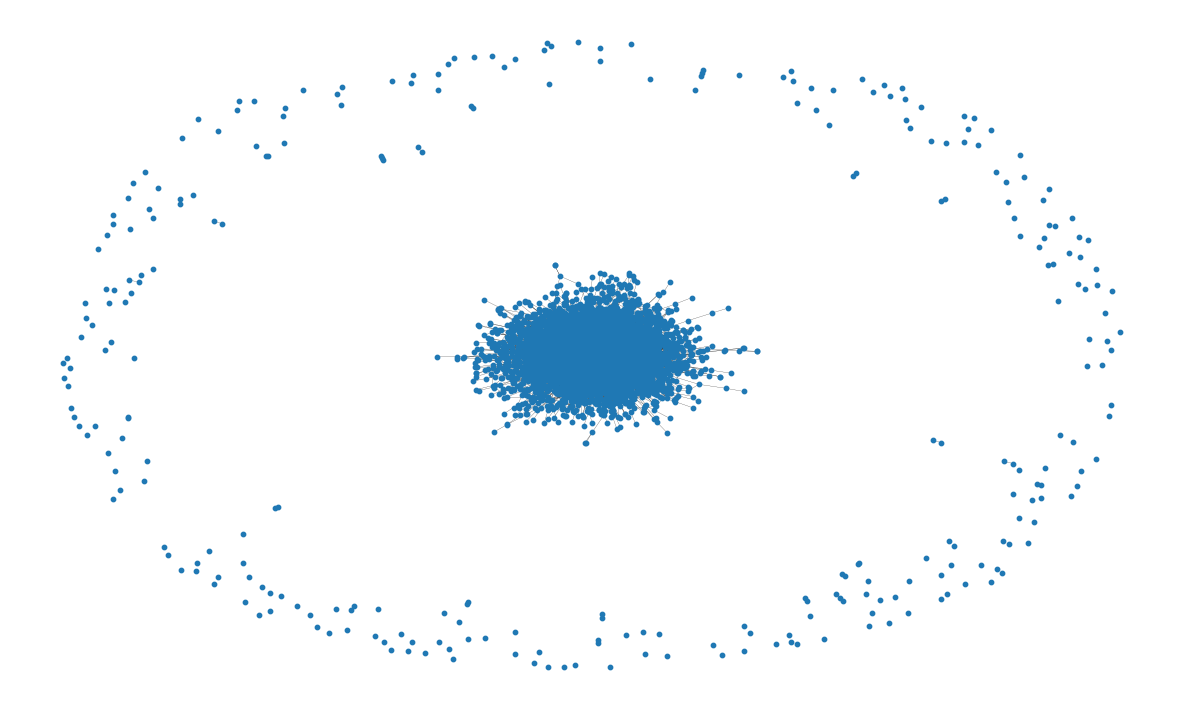

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(RG, pos=nx.spring_layout(RG), ax=ax, **plot_options)

We just Analize the Biggest component

In [ ]:
largest_comp = max(nx.connected_components(RG), key=len)
RGL = RG.subgraph(largest_comp)
nx.draw(RGL, node_size=10)